In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
# Caricamento e gestione del dataset sulla fertilità
fertility_ds = pd.read_csv('../../resources/fertility_rate.csv', delimiter=';')
fertility_ds = fertility_ds.filter(items=['Country or Area', 'Year(s)', 'Value'])
fertility_ds

,Country or Area,Year(s),Value
0,ADB region: Central and West Asia,2023,3.5252
1,ADB region: Central and West Asia,2022,3.5636
2,ADB region: Central and West Asia,2021,3.6138
3,ADB region: Central and West Asia,2020,3.6272
4,ADB region: Central and West Asia,2019,3.6371
...,...,...,...
18865,Zimbabwe,1994,4.2843
18866,Zimbabwe,1993,4.3910
18867,Zimbabwe,1992,4.5672
18868,Zimbabwe,1991,4.7153


In [204]:
import geopandas as gpd

world = gpd.read_file('../../resources/world-administrative-boundaries.shp')
world = world.rename(columns={'name': 'Country or Area'})
world

,iso3,status,color_code,Country or Area,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.9211 -1.00194, 33.92027 -1.00111,..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.7525, 40.12861 15...."
4,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
...,...,...,...,...,...,...,...,...,...
251,MDA,Member State,MDA,"Moldova, Republic of",Europe,Eastern Europe,MD,République de Moldova,"POLYGON ((28.21484 45.44865, 28.21131 45.45011..."
252,NRU,Member State,NRU,Nauru,Oceania,Micronesia,NR,Nauru,"POLYGON ((166.92482 -0.55164, 166.91888 -0.552..."
253,THA,Member State,THA,Thailand,Asia,South-Eastern Asia,TH,Thaïlande,"MULTIPOLYGON (((99.66804 6.49639, 99.65263 6.4..."
254,NPL,Member State,NPL,Nepal,Asia,Southern Asia,NP,Népal,"POLYGON ((88.14279 27.86605, 88.15248 27.86416..."


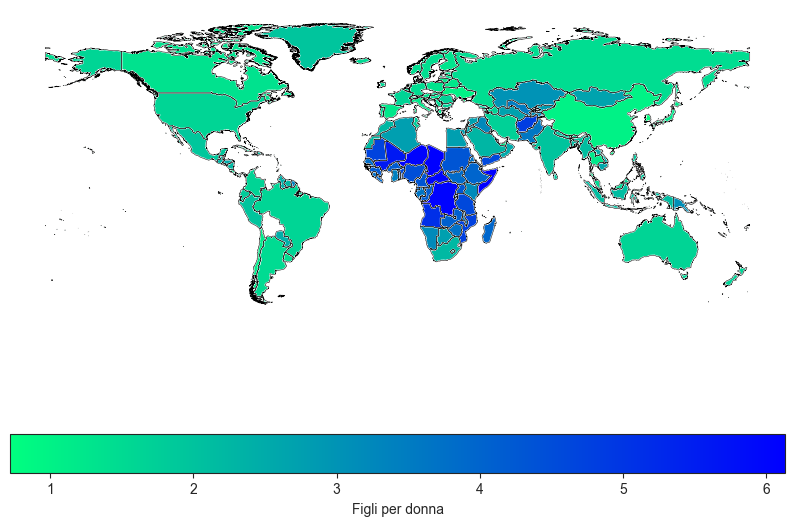

In [205]:
sns.set_style('white')
world = pd.merge(
    left=world,
    right=fertility_ds[fertility_ds['Year(s)'] == 2023],
    how='left',
)

world = world.dropna()

ax = world.boundary.plot(
    edgecolor='black',
    linewidth=.35,
    figsize=(10,10)
)
world.plot(
    ax=ax,
    column='Value',
    legend=True,
    legend_kwds={
        'label': 'Figli per donna',
        'orientation': 'horizontal'
    },
    missing_kwds={
         "color": "lightgrey",
         "edgecolor": "red",
         "hatch": "///",
         "label": "Missing values",
     },
    cmap='winter_r',
)

ax.set_xticklabels('')
ax.set_yticklabels('')
sns.despine(left=True, right=True, bottom=True, top=True)
plt.show()

In [206]:
fertility_ds_continents = fertility_ds[(fertility_ds['Country or Area'] == 'Asia') | (fertility_ds['Country or Area'] == 'Africa') | (fertility_ds['Country or Area'] == 'Europe') | (fertility_ds['Country or Area'] == 'Northern America') | (fertility_ds['Country or Area'] == 'South America') | (fertility_ds['Country or Area'] == 'Oceania')]
fertility_ds_continents

,Country or Area,Year(s),Value
238,Africa,2023,4.0718
239,Africa,2022,4.1247
240,Africa,2021,4.1794
241,Africa,2020,4.2423
242,Africa,2019,4.3122
...,...,...,...
15465,South America,1994,2.8492
15466,South America,1993,2.9072
15467,South America,1992,2.9587
15468,South America,1991,3.0330


In [207]:
fertility_ds_continents['Country or Area'].unique()

array(['Africa', 'Asia', 'Europe', 'Northern America', 'Oceania',
       'South America'], dtype=object)

Iniziamo con il fare una comparazione fra il 1999 ed il 2023 sulla variazione della fertilità a seconda del continente:

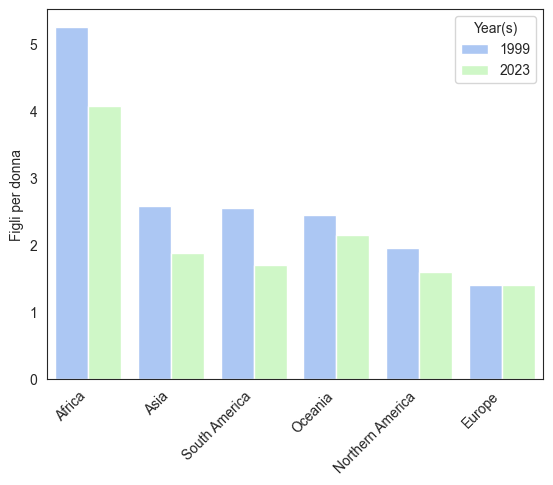

In [208]:
fertility_ds_continents_99and23 = fertility_ds_continents[(fertility_ds_continents['Year(s)'] == 1999) | (fertility_ds_continents['Year(s)'] == 2023)].sort_values(by='Value', ascending=False)
ax = sns.barplot(
    data=fertility_ds_continents_99and23,
    x='Country or Area',
    y='Value',
    hue='Year(s)',
    palette={1999: '#A0C4FF', 2023: '#CAFFBF'}
)
ax.set(xlabel=None)
plt.xticks(rotation=45, ha='right')
ax.set(ylabel='Figli per donna')
plt.show()

Grafico fertilità della Cina (caso particolare legge sul secondo figlio):

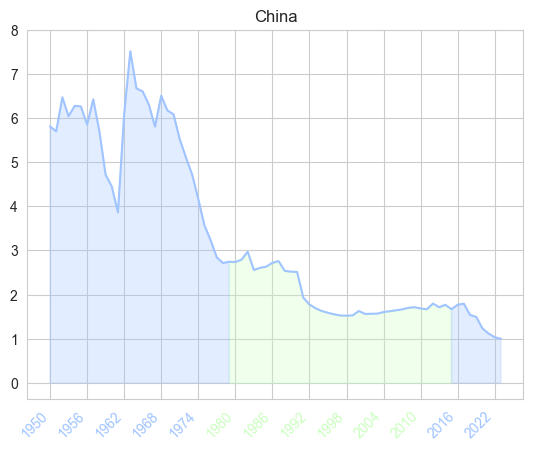

In [209]:
sns.set_style('whitegrid')
fertility_ds_china_3yspan = pd.read_csv('../../resources/fertility_rate_complete.csv', delimiter=';')
fertility_ds_china_3yspan = fertility_ds_china_3yspan[(fertility_ds_china_3yspan['Country or Area'] == 'China') & (fertility_ds_china_3yspan['Year(s)'] < 2024)]
ax = sns.lineplot(
    data=fertility_ds_china_3yspan,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
l1 = ax.lines[0]

x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(
    x1, y1,
    where=(x1 >= 1979) & (x1 <= 2015 ),
    color='#CAFFBF',
    alpha=0.3
)
ax.fill_between(
    x1, y1,
    where=(x1 <= 1979) | (x1 >= 2015),
    color='#A0C4FF',
    alpha=0.3
)
ax.set_title('China')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks(range(1950, 2024, 6))
ax.set_xticklabels(labels=range(1950, 2024, 6), rotation=45, ha='right')
ax.set_yticks(np.arange(0, 8.01, 1))
for value, label in enumerate(ax.get_xticklabels()):
    year = int(label.get_text())
    if (2015 > year > 1979):
        label.set_color(color='#CAFFBF')
    else:
        label.set_color(color='#A0C4FF')
plt.show()

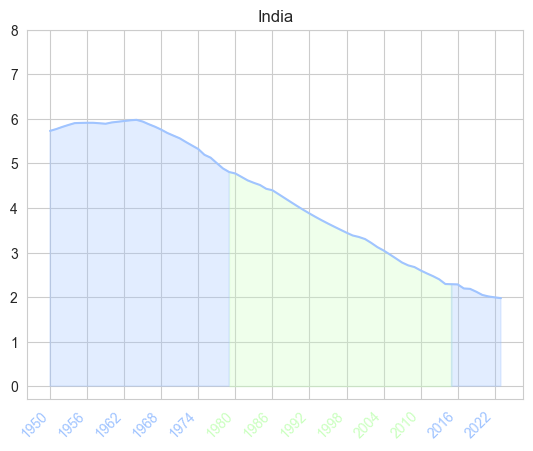

In [210]:
sns.set_style('whitegrid')
fertility_ds_india_3yspan = pd.read_csv('../../resources/fertility_rate_complete.csv', delimiter=';')
fertility_ds_india_3yspan = fertility_ds_india_3yspan[(fertility_ds_india_3yspan['Country or Area'] == 'India') & (fertility_ds_india_3yspan['Year(s)'] < 2024)]
ax = sns.lineplot(
    data=fertility_ds_india_3yspan,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
l1 = ax.lines[0]

x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(
    x1, y1,
    where=(x1 >= 1979) & (x1 <= 2015 ),
    color='#CAFFBF',
    alpha=0.3
)
ax.fill_between(
    x1, y1,
    where=(x1 <= 1979) | (x1 >= 2015),
    color='#A0C4FF',
    alpha=0.3
)
ax.set_title('India')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks(range(1950, 2024, 6))
ax.set_xticklabels(labels=range(1950, 2024, 6), rotation=45, ha='right')
ax.set_yticks(np.arange(0, 8.01, 1))
for value, label in enumerate(ax.get_xticklabels()):
    year = int(label.get_text())
    if (2015 > year > 1979):
        label.set_color(color='#CAFFBF')
    else:
        label.set_color(color='#A0C4FF')
plt.show()

In [211]:
hdi = pd.read_csv('../../resources/human_development_index.csv', delimiter=';')
hdi

,Country,1990,2000,2010,2015,2019,2020,2021,2022
0,Switzerland,"0,850","0,885","0,940","0,952","0,960","0,957","0,965","0,967"
1,Norway,"0,845","0,914","0,938","0,952","0,961","0,963","0,964","0,966"
2,Iceland,"0,834","0,895","0,927","0,948","0,958","0,955","0,957","0,959"
3,"Hong Kong, China (SAR)","0,739","0,831","0,914","0,936","0,953","0,955","0,959","0,956"
4,Denmark,"0,839","0,890","0,913","0,936","0,946","0,946","0,947","0,952"
...,...,...,...,...,...,...,...,...,...
189,Niger,"0,212","0,260","0,336","0,367","0,390","0,391","0,389","0,394"
190,Central African Republic,"0,333","0,319","0,357","0,367","0,391","0,389","0,387","0,387"
191,South Sudan,..,..,"0,406","0,381","0,391","0,386","0,381","0,381"
192,Somalia,..,..,..,..,..,..,..,"0,380"


In [212]:
hdi_10years = hdi.filter(items=['Country', '1990', '2000', '2010', '2020'])
hdi_10years = pd.melt(hdi_10years, id_vars='Country', value_vars=['1990', '2000', '2010', '2020'], var_name='Year', value_name='Value')
hdi_10years

,Country,Year,Value
0,Switzerland,1990,"0,850"
1,Norway,1990,"0,845"
2,Iceland,1990,"0,834"
3,"Hong Kong, China (SAR)",1990,"0,739"
4,Denmark,1990,"0,839"
...,...,...,...
771,Niger,2020,"0,391"
772,Central African Republic,2020,"0,389"
773,South Sudan,2020,"0,386"
774,Somalia,2020,..


Trend del Human Index Development in Europa (campione preso osservando Italia, Francia, UK, Grecia, Spagna e Germania):

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\1415293264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)


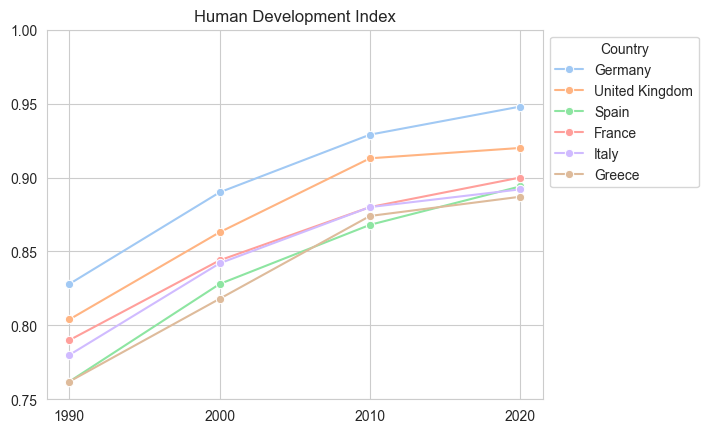

In [213]:
def convert_to_float(value: str) -> float:
    try:
        return float(value.replace(',', '.'))
    except ValueError:
        return float('nan')

hdi_10years_europe = hdi_10years[(hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'France') | (hdi_10years['Country'] == 'Germany') | (hdi_10years['Country'] == 'Spain') | (hdi_10years['Country'] == 'United Kingdom') | (hdi_10years['Country'] == 'Greece')]
hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_europe,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(.75, 1.01, .05))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

Osservazione del HDI con alcuni casi specifici in vari continenti:

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\3078348177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)


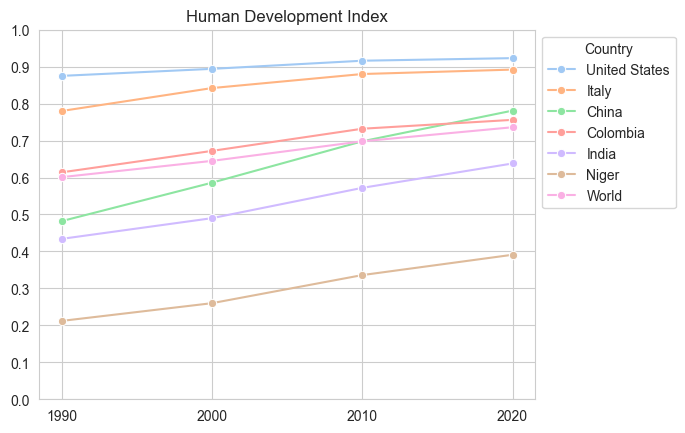

In [214]:
hdi_10years_mixed = hdi_10years[(hdi_10years['Country'] == 'China') | (hdi_10years['Country'] == 'India') | (hdi_10years['Country'] == 'Niger') | (hdi_10years['Country'] == 'Colombia') | (hdi_10years['Country'] == 'United States') | (hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'World')]
hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_mixed,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(0, 1.01, .1))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

Correlazione fra fertilità e HDI in alcuni stati:

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\511201643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_italy['Value'] = hdi_10years_italy['Value'].apply(convert_to_float)


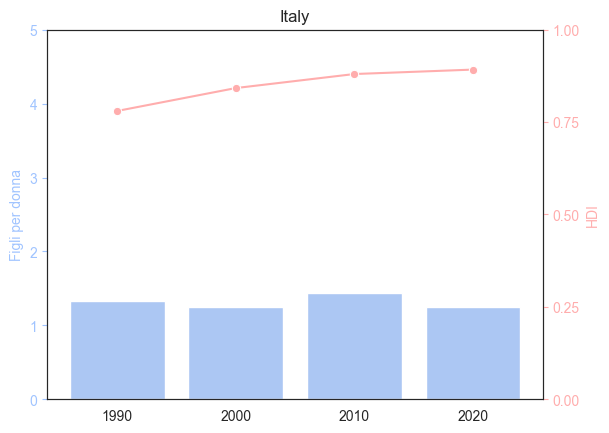

In [215]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_italy_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'Italy') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_italy_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('Italy')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_italy = hdi_10years[(hdi_10years['Country'] == 'Italy')]
hdi_10years_italy['Value'] = hdi_10years_italy['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_italy,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\1415678156.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_india['Value'] = hdi_10years_india['Value'].apply(convert_to_float)


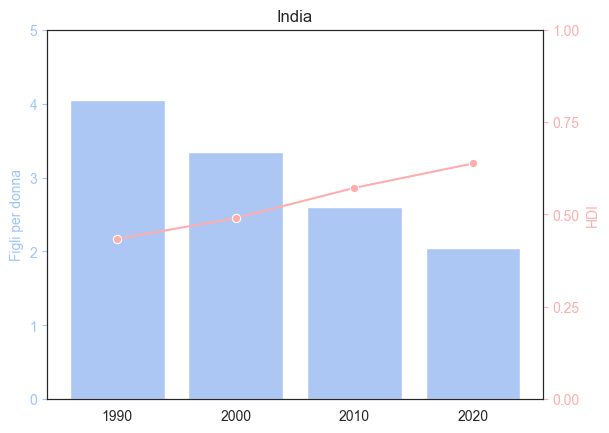

In [216]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_india_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'India') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_india_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('India')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_india = hdi_10years[(hdi_10years['Country'] == 'India')]
hdi_10years_india['Value'] = hdi_10years_india['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_india,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\4052540156.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_china['Value'] = hdi_10years_china['Value'].apply(convert_to_float)


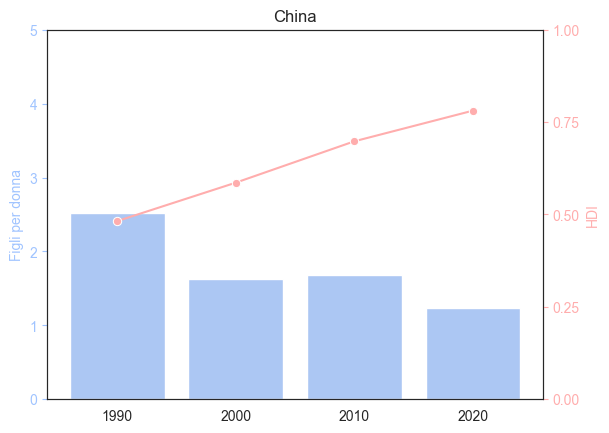

In [217]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_china_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'China') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_china_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('China')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_china = hdi_10years[(hdi_10years['Country'] == 'China')]
hdi_10years_china['Value'] = hdi_10years_china['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_china,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\1232503513.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_egypt['Value'] = hdi_10years_egypt['Value'].apply(convert_to_float)


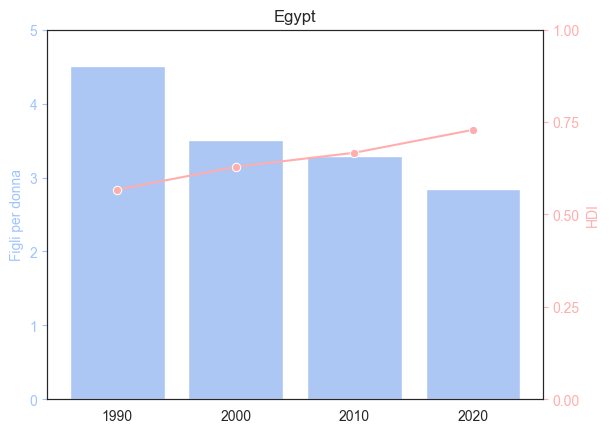

In [218]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_egypt_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'Egypt') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_egypt_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('Egypt')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_egypt = hdi_10years[(hdi_10years['Country'] == 'Egypt')]
hdi_10years_egypt['Value'] = hdi_10years_egypt['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_egypt,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

In [219]:
gii = pd.read_json('../../resources/gender_inequality_index.json')
gii_world = gii[gii['country'] == 'World']
gii_world

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
28906,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1990,50.981,
28907,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1991,46.501,
28908,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1992,46.933,
28909,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1993,45.938,
28910,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1994,45.887,
...,...,...,...,...,...,...,...,...,...,...
29066,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2018,209.144,
29067,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2019,210.076,
29068,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2020,206.745,
29069,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2021,211.729,


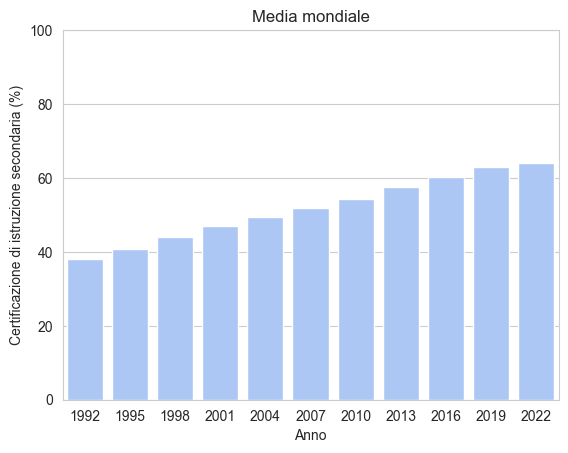

In [220]:
sns.set_style('whitegrid')
ax = sns.barplot(
    data=gii_world[(gii_world['year'] % 3 == 0) & (gii_world['indicator'] == 'Population with at least some secondary education, female (% ages 25 and older)')],
    x='year',
    y='value',
    color='#A0C4FF'
)
ax.set_title('Media mondiale')
ax.set(xlabel='Anno')
ax.set(ylabel='Certificazione di istruzione secondaria (%)')
ax.set_yticks(np.arange(0, 100.01, 20))
plt.show()

In [221]:
gii_99and22_fempopsec = gii[((gii['year'] == 2022) | (gii['year'] == 1990)) & (gii['indicator'] == 'Population with at least some secondary education, female (% ages 25 and older)')]
gii_99and22_fempopsec = gii_99and22_fempopsec[(gii_99and22_fempopsec['country'] == 'China') | (gii_99and22_fempopsec['country'] == 'Italy') | (gii_99and22_fempopsec['country'] == 'United States') | (gii_99and22_fempopsec['country'] == 'India') | (gii_99and22_fempopsec['country'] == 'Korea (Republic of)') | (gii_99and22_fempopsec['country'] == 'Egypt')]
gii_99and22_fempopsec

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
4806,CHN,China,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1990,28.515,
4838,CHN,China,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,79.702,
7388,EGY,Egypt,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1990,31.003,
7420,EGY,Egypt,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,85.934,
11089,IND,India,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1990,12.819,
11121,IND,India,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,40.959,
12069,ITA,Italy,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1990,43.449,
12101,ITA,Italy,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,78.627,
13437,KOR,Korea (Republic of),GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1990,57.500,
13469,KOR,Korea (Republic of),GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,83.781,


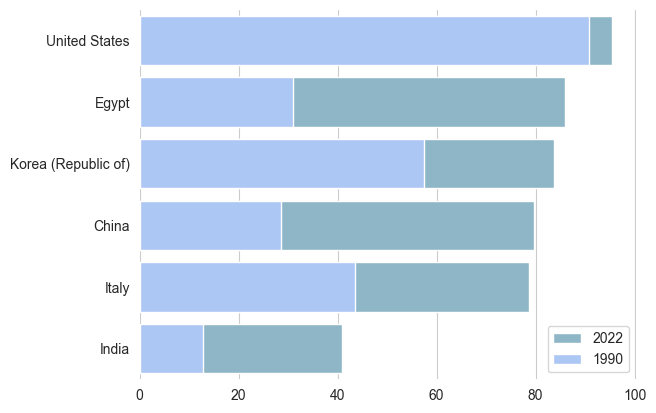

In [241]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
gii_99and22_fempopsec = gii_99and22_fempopsec.sort_values(by='value', ascending=False)

sns.barplot(
    data=gii_99and22_fempopsec[gii_99and22_fempopsec['year'] == 2022],
    x='value',
    y='country',
    label='2022',
    color='#86B9D0'
)

sns.barplot(
    data=gii_99and22_fempopsec[gii_99and22_fempopsec['year'] == 1990],
    x='value',
    y='country',
    color='#A0C4FF',
    label='1990',
)

ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks(np.arange(0, 100.01, 20))
sns.despine(left=True, bottom=True)

plt.show()

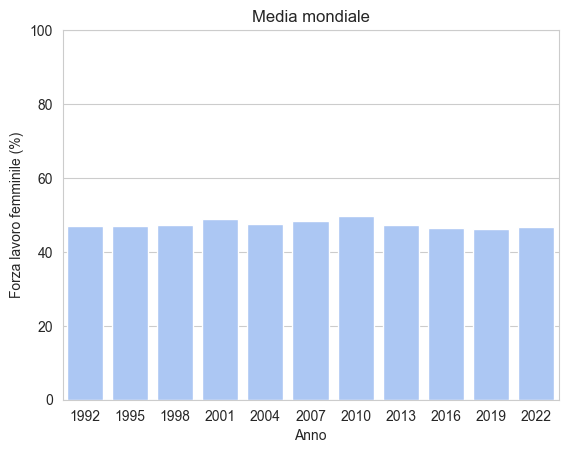

In [230]:
sns.set_style('whitegrid')
ax = sns.barplot(
    data=gii_world[(gii_world['year'] % 3 == 0) & (gii_world['indicator'] == 'Labour force participation rate, female (% ages 15 and older)')],
    x='year',
    y='value',
    color='#A0C4FF'
)
ax.set_title('Media mondiale')
ax.set(xlabel='Anno')
ax.set(ylabel='Forza lavoro femminile (%)')
ax.set_yticks(np.arange(0, 100.01, 20))
plt.show()

In [226]:
gii_99and22_femlabourrate = gii[((gii['year'] == 2022) | (gii['year'] == 1990)) & (gii['indicator'] == 'Labour force participation rate, female (% ages 15 and older)')]
gii_99and22_femlabourrate = gii_99and22_femlabourrate[(gii_99and22_femlabourrate['country'] == 'China') | (gii_99and22_femlabourrate['country'] == 'Italy') | (gii_99and22_femlabourrate['country'] == 'United States') | (gii_99and22_femlabourrate['country'] == 'India') | (gii_99and22_femlabourrate['country'] == 'Korea (Republic of)') | (gii_99and22_femlabourrate['country'] == 'Egypt')]
gii_99and22_femlabourrate

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
4740,CHN,China,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1990,73.02,
4772,CHN,China,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",2022,53.76,
7322,EGY,Egypt,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1990,26.74,
7354,EGY,Egypt,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",2022,15.34,
10990,IND,India,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1990,33.71,
11022,IND,India,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",2022,28.26,
11970,ITA,Italy,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1990,34.97,
12002,ITA,Italy,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",2022,40.69,
13371,KOR,Korea (Republic of),GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1990,46.98,
13403,KOR,Korea (Republic of),GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",2022,55.04,


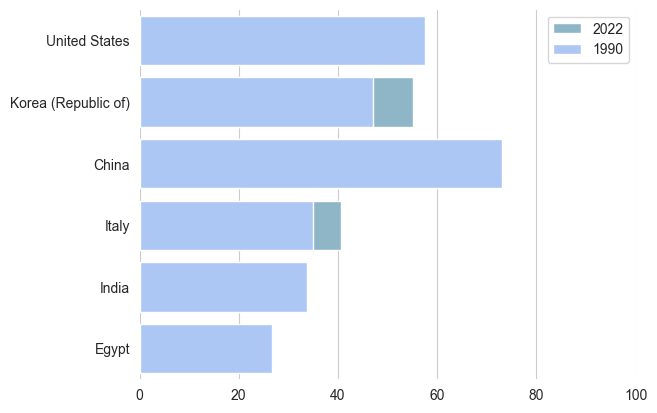

In [242]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
gii_99and22_femlabourrate = gii_99and22_femlabourrate.sort_values(by='value', ascending=False)

sns.barplot(
    data=gii_99and22_femlabourrate[gii_99and22_femlabourrate['year'] == 2022],
    x='value',
    y='country',
    label='2022',
    color='#86B9D0'
)

sns.barplot(
    data=gii_99and22_femlabourrate[gii_99and22_femlabourrate['year'] == 1990],
    x='value',
    y='country',
    color='#A0C4FF',
    label='1990',
)

ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks(np.arange(0, 100.01, 20))
sns.despine(left=True, bottom=True)

plt.show()

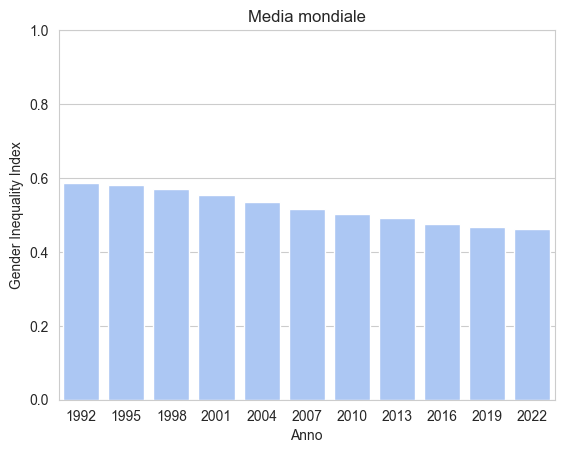

In [239]:
sns.set_style('whitegrid')
ax = sns.barplot(
    data=gii_world[(gii_world['year'] % 3 == 0) & (gii_world['indicator'] == 'Gender Inequality Index (value)')],
    x='year',
    y='value',
    color='#A0C4FF'
)
ax.set_title('Media mondiale')
ax.set(xlabel='Anno')
ax.set(ylabel='Gender Inequality Index')
ax.set_yticks(np.arange(0, 1.01, .2))
plt.show()

In [247]:
gii_99and22 = gii[((gii['year'] == 2022) | (gii['year'] == 1990)) & (gii['indicator'] == 'Gender Inequality Index (value)')]
gii_99and22 = gii_99and22[(gii_99and22['country'] == 'Italy') | (gii_99and22['country'] == 'United States') | (gii_99and22['country'] == 'India') | (gii_99and22['country'] == 'Korea (Republic of)') | (gii_99and22['country'] == 'Egypt')]
gii_99and22

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
7289,EGY,Egypt,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),1990,0.653,
7321,EGY,Egypt,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),2022,0.389,
11023,IND,India,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),1990,0.693,
11055,IND,India,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),2022,0.437,
12003,ITA,Italy,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),1990,0.241,
12035,ITA,Italy,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),2022,0.057,
13338,KOR,Korea (Republic of),GII,Gender Inequality Index,,gii,Gender Inequality Index (value),1990,0.304,
13370,KOR,Korea (Republic of),GII,Gender Inequality Index,,gii,Gender Inequality Index (value),2022,0.062,
25859,USA,United States,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),1990,0.288,
25891,USA,United States,GII,Gender Inequality Index,,gii,Gender Inequality Index (value),2022,0.180,


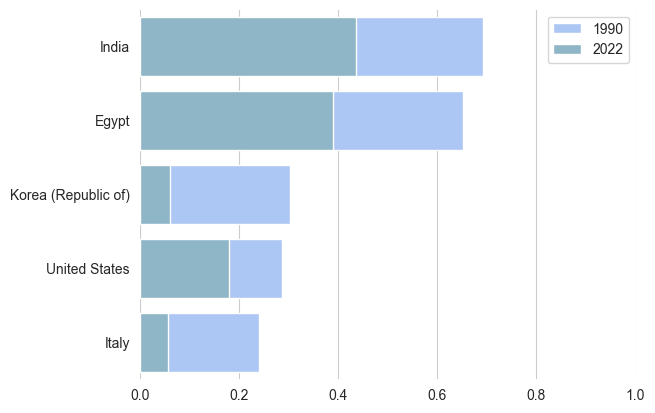

In [248]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
gii_99and22 = gii_99and22.sort_values(by='value', ascending=False)

sns.barplot(
    data=gii_99and22[gii_99and22['year'] == 1990],
    x='value',
    y='country',
    color='#A0C4FF',
    label='1990',
)

sns.barplot(
    data=gii_99and22[gii_99and22['year'] == 2022],
    x='value',
    y='country',
    label='2022',
    color='#86B9D0'
)


ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks(np.arange(0, 1.01, .2))
sns.despine(left=True, bottom=True)

plt.show()

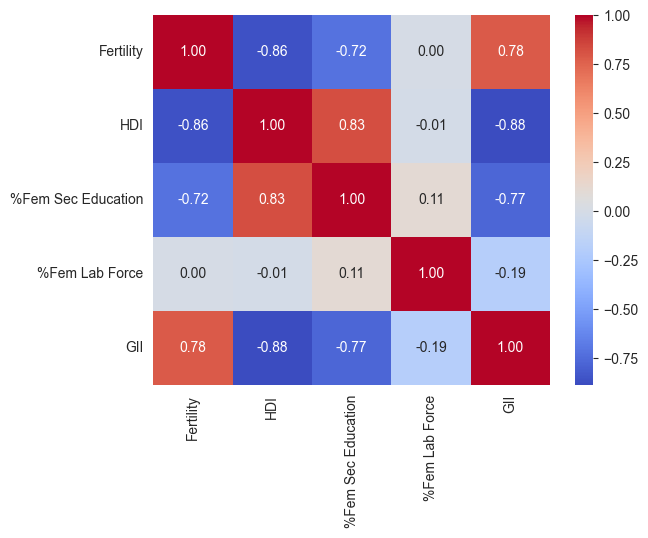

In [260]:
# TODO: da finire heatmap
def convert_to_integer(x):
    return int(x)

df1 = fertility_ds
df1 = df1.rename(columns={'Country or Area': 'Country'})
df2 = hdi_10years
df2 = df2.rename(columns={'Year': 'Year(s)'})
df2['Year(s)'] = df2['Year(s)'].apply(convert_to_integer)
df2['Value'] = df2['Value'].apply(convert_to_float)
df3 = gii[gii['indicator'] == 'Population with at least some secondary education, female (% ages 25 and older)']
df3 = df3.rename(columns={'country': 'Country', 'year': 'Year(s)', 'value': '%Fem Sec Education'})
df4 = gii[gii['indicator'] == 'Labour force participation rate, female (% ages 15 and older)']
df4 = df4.rename(columns={'country': 'Country', 'year': 'Year(s)', 'value': '%Fem Lab Force'})
df5 = gii[gii['indicator'] == 'Gender Inequality Index (value)']
df5 = df5.rename(columns={'country': 'Country', 'year': 'Year(s)', 'value': 'GII'})

merged_data = pd.merge(df1, df2, on=['Country', 'Year(s)'])
merged_data = pd.merge(merged_data, df3, on=['Country', 'Year(s)'])
merged_data = pd.merge(merged_data, df4, on=['Country', 'Year(s)'])
merged_data = pd.merge(merged_data, df5, on=['Country', 'Year(s)'])
merged_data = merged_data.rename(columns={'Value_x': 'Fertility', 'Value_y': 'HDI'})

correlation_matrix = merged_data[['Fertility', 'HDI', '%Fem Sec Education', '%Fem Lab Force', 'GII']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', robust=True, fmt='.2f')
plt.show()

In [224]:
merged_data

,Country,Year(s),Fertility,HDI,countryIsoCode,indexCode,index,dimension,indicatorCode,indicator,%Fem Sec Education,note
0,Afghanistan,2020,5.1453,0.488,AFG,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,6.092,
1,Afghanistan,2010,6.1950,0.449,AFG,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2.827,
2,Afghanistan,2000,7.5661,0.340,AFG,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2.162,
3,Afghanistan,1990,7.5758,0.284,AFG,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1.108,
4,Albania,2020,1.3707,0.784,ALB,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,82.249,
...,...,...,...,...,...,...,...,...,...,...,...,...
620,Zambia,1990,6.5667,0.417,ZMB,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,13.081,
621,Zimbabwe,2020,3.7543,0.554,ZWE,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,63.435,
622,Zimbabwe,2010,4.0401,0.481,ZWE,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,51.649,
623,Zimbabwe,2000,4.0088,0.426,ZWE,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,32.999,
